In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [3]:
df_train = pd.read_csv('../input/dankook/train.csv', index_col=0)
df_test = pd.read_csv('../input/dankook/test.csv', index_col=0)
sample_submission = pd.read_csv('../input/dankook/sample_submission.csv', index_col=0)

In [4]:
print("train 데이터 개수: {0}".format(len(df_train)))
print("test 데이터 개수: {0}".format(len(df_test)))

train 데이터 개수: 320000
test 데이터 개수: 80000


In [5]:
# test의 MinMax 범위 넘는 행은 train에서 제거
train_shape = 199991

for col in df_train.columns[:18]:
    df_train = df_train.loc[np.logical_and(df_train[col]>df_test[col].min(),df_train[col]<df_test[col].max())]

print('제거된 행 개수 :', 199991 - df_train.shape[0])

제거된 행 개수 : -13419


In [6]:
df_train.describe()

,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
count,213410.000000,213410.000000,213410.000000,213410.000000,213410.000000,213410.000000,213410.000000,213410.000000,213410.000000,213410.000000,213410.000000,213410.000000,213410.000000,213410.000000,213410.000000,213410.000000,213410.000000,213410.000000,213410.000000
mean,20.004480,18.555582,17.843163,17.402958,17.153371,0.058677,19.791687,18.389539,17.728440,17.317825,17.089803,8.972972,8.704541,1.183504,1.184516,1.182625,1.183047,1.183992,1.036995
std,1.948858,1.646000,1.443035,1.304735,1.313031,0.254173,1.895989,1.622438,1.432455,1.299337,1.299673,9.858348,9.480269,0.109272,0.111074,0.107643,0.108435,0.110151,0.930739
min,6.430842,11.822671,11.051906,7.711483,-9.254774,-19.245156,-22.203960,-13.152750,-4.777538,0.071030,3.843523,2.000000,2.000000,1.000323,1.000163,1.000559,1.000431,1.000233,0.000000
25%,18.813196,17.557560,16.952870,16.588125,16.349120,0.000006,18.653742,17.428883,16.860183,16.517323,16.294353,2.000000,2.000000,1.110327,1.110115,1.109530,1.110064,1.110225,0.000000
50%,19.555541,18.245892,17.613510,17.232573,16.998921,0.041510,19.384675,18.117490,17.526840,17.165400,16.947775,3.000000,3.000000,1.186065,1.186405,1.185904,1.185990,1.186221,1.000000
75%,20.768128,19.368905,18.702742,18.238724,17.938109,0.094244,20.510198,19.178793,18.566130,18.131602,17.859645,16.000000,16.000000,1.229933,1.229567,1.230515,1.230632,1.229610,2.000000
max,47.335378,46.338272,31.963770,31.886506,46.240824,44.619848,30.777850,30.317970,30.414900,30.550860,28.571020,43.000000,41.000000,2.049124,2.078569,2.020547,2.034710,2.063705,2.000000


In [7]:
dataset = pd.concat([df_train,df_test], axis=0)
df_train_len = len(df_train)

dataset.fillna(-1, inplace=True)
dataset.tail()

/Users/morphine/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,airmass_g,airmass_i,airmass_r,airmass_u,airmass_z,class,dered_g,dered_i,dered_r,dered_u,dered_z,g,i,nDetect,nObserve,r,redshift,u,z
id,,,,,,,,,,,,,,,,,,,
399995,1.186322,1.185652,1.185493,1.185843,1.186067,-1.0,18.39331,17.98610,18.08600,19.33614,17.96699,18.661662,18.122501,17,17,18.270788,-0.000317,19.673388,18.062672
399996,1.290772,1.282120,1.279329,1.284956,1.287838,-1.0,20.63992,20.95069,20.54506,21.39935,20.78268,20.728282,21.004875,4,8,20.608695,0.065455,21.522869,20.845799
399997,1.188563,1.188480,1.188518,1.188475,1.188503,-1.0,17.87533,18.00426,17.90469,18.91359,18.04000,18.241076,18.197753,1,1,18.160492,-0.000842,19.399065,18.201831
399998,1.181329,1.180025,1.179654,1.180429,1.180862,-1.0,17.48798,16.76595,17.05567,18.77153,16.55850,17.600868,16.822347,17,17,17.132878,0.042817,18.899747,16.594561
399999,1.177529,1.186009,1.188900,1.183152,1.180324,-1.0,20.21810,20.66961,20.39393,20.49577,20.90850,20.425247,20.772863,5,5,20.536181,0.000285,20.758705,20.969791


In [8]:
test = dataset.loc[ dataset.index >= df_train_len, :]
len(test)

151222

In [9]:
dataset['nObserve'].hist(bins=30)

In [10]:
dataset['nObserve'] = dataset['nObserve'].apply(np.log1p)

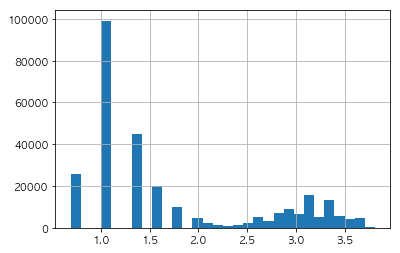

In [11]:
dataset['nObserve'].hist(bins=30)

In [12]:
dataset['d_dered_u'] = dataset['dered_u'] - dataset['u']
dataset['d_dered_g'] = dataset['dered_g'] - dataset['g']
dataset['d_dered_r'] = dataset['dered_r'] - dataset['r']
dataset['d_dered_i'] = dataset['dered_i'] - dataset['i']
dataset['d_dered_z'] = dataset['dered_z'] - dataset['z']
dataset['d_dered_rg'] = dataset['dered_r'] - dataset['dered_g']
dataset['d_dered_ig'] = dataset['dered_i'] - dataset['dered_g']
dataset['d_dered_zg'] = dataset['dered_z'] - dataset['dered_g']
dataset['d_dered_ri'] = dataset['dered_r'] - dataset['dered_i']
dataset['d_dered_rz'] = dataset['dered_r'] - dataset['dered_z']
dataset['d_dered_iz'] = dataset['dered_i'] - dataset['dered_z']
dataset['d_obs_det'] = dataset['nObserve'] - dataset['nDetect']

# https://www.sdss.org/dr16/algorithms/segue_target_selection/#Legacy

dataset['i-color'] = -0.436*dataset['u']+1.129*dataset['g']- 0.119*dataset['r'] - 0.574*dataset['i'] + 0.1984
dataset['s-color'] = -0.249*dataset['u'] + 0.794*dataset['g'] - 0.555*dataset['r'] + 0.234
dataset['p1'] = 0.91*(dataset['u']-dataset['g']) + 0.415*(dataset['g']-dataset['r']) -1.280


print(dataset.shape)
dataset.head()

(293410, 34)


,airmass_g,airmass_i,airmass_r,airmass_u,airmass_z,class,dered_g,dered_i,dered_r,dered_u,...,d_dered_rg,d_dered_ig,d_dered_zg,d_dered_ri,d_dered_rz,d_dered_iz,d_obs_det,i-color,s-color,p1
id,,,,,,,,,,,,,,,,,,,,,
0,1.190681,1.189355,1.188979,1.189764,1.190206,0.0,20.25779,17.63211,18.95512,23.12426,...,-1.30267,-2.62568,-3.34885,1.32301,2.04618,0.72317,-15.055561,0.609422,0.038400,1.934555
2,1.024105,1.021730,1.020983,1.022499,1.023291,0.0,15.68659,15.32173,15.44004,16.60765,...,-0.24655,-0.36486,-0.39051,0.11831,0.14396,0.02565,-0.901388,0.061731,-0.003078,-0.285548
3,1.206058,1.205120,1.204874,1.205399,1.205712,0.0,20.99465,19.79465,20.08727,25.35365,...,-0.90738,-1.20000,-1.43947,0.29262,0.53209,0.23947,-1.390562,-0.893584,-0.554392,3.190980
4,1.194285,1.193826,1.193738,1.193946,1.194099,0.0,20.43384,18.19028,18.86299,23.77140,...,-1.57085,-2.24356,-2.55792,0.67271,0.98707,0.31436,-9.360943,0.121963,0.011723,2.823949
6,1.202019,1.201927,1.201963,1.201924,1.201954,0.0,20.70001,19.42051,19.87659,23.84584,...,-0.82342,-1.27950,-1.69600,0.45608,0.87258,0.41650,-0.901388,-0.255917,-0.254008,1.864297


In [13]:
dataset.drop(['airmass_z', 'airmass_i', 'airmass_r', 'airmass_g', 'u', 'g', 'r', 'i', 'nDetect'], 
        axis=1, inplace=True)
print(dataset.shape)
dataset.head()

(293410, 25)


,airmass_u,class,dered_g,dered_i,dered_r,dered_u,dered_z,nObserve,redshift,z,...,d_dered_rg,d_dered_ig,d_dered_zg,d_dered_ri,d_dered_rz,d_dered_iz,d_obs_det,i-color,s-color,p1
id,,,,,,,,,,,,,,,,,,,,,
0,1.189764,0.0,20.25779,17.63211,18.95512,23.12426,16.90894,2.944439,-0.000081,16.939607,...,-1.30267,-2.62568,-3.34885,1.32301,2.04618,0.72317,-15.055561,0.609422,0.038400,1.934555
2,1.022499,0.0,15.68659,15.32173,15.44004,16.60765,15.29608,1.098612,0.000472,15.350032,...,-0.24655,-0.36486,-0.39051,0.11831,0.14396,0.02565,-0.901388,0.061731,-0.003078,-0.285548
3,1.205399,0.0,20.99465,19.79465,20.08727,25.35365,19.55518,1.609438,0.000006,19.634649,...,-0.90738,-1.20000,-1.43947,0.29262,0.53209,0.23947,-1.390562,-0.893584,-0.554392,3.190980
4,1.193946,0.0,20.43384,18.19028,18.86299,23.77140,17.87592,2.639057,-0.000033,17.982649,...,-1.57085,-2.24356,-2.55792,0.67271,0.98707,0.31436,-9.360943,0.121963,0.011723,2.823949
6,1.201924,0.0,20.70001,19.42051,19.87659,23.84584,19.00401,1.098612,-0.000042,19.052571,...,-0.82342,-1.27950,-1.69600,0.45608,0.87258,0.41650,-0.901388,-0.255917,-0.254008,1.864297


In [15]:
#### 제출용

# train set
X_train = dataset.loc[dataset['class']!=-1,:]
X_train.drop(columns='class',inplace=True,axis=1)
y_train = dataset.loc[dataset['class']!=-1, 'class']

# test set
X_test = dataset.loc[dataset['class']==-1,:]
X_test.drop(columns='class', inplace=True,axis=1)


#### 연습용
# train set
# X = dataset.loc[dataset['class']!=-1,:]
# X.drop(columns='class',inplace=True,axis=1)
# y = dataset.loc[dataset['class']!=-1, 'class']

# # test set
# test = dataset.loc[dataset['class']==-1,:]
# test.drop(columns='class', inplace=True,axis=1)

# train set split
# SEED = 2020
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = SEED)

/Users/morphine/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [18]:
X_test

,airmass_u,dered_g,dered_i,dered_r,dered_u,dered_z,nObserve,redshift,z,d_dered_u,...,d_dered_rg,d_dered_ig,d_dered_zg,d_dered_ri,d_dered_rz,d_dered_iz,d_obs_det,i-color,s-color,p1
id,,,,,,,,,,,,,,,,,,,,,
320000,1.156348,17.95495,17.08381,17.43085,19.07495,16.90872,0.693147,1.213034e-01,16.926293,-0.068100,...,-0.52410,-0.87114,-1.04623,0.34704,0.52213,0.17509,-0.306853,0.290459,0.075381,-0.029739
320001,1.007637,14.30976,14.51600,14.39011,15.07033,14.63716,1.098612,-6.690713e-05,15.730708,-3.670580,...,0.08035,0.20624,0.32740,-0.12589,-0.24705,-0.12116,-0.901388,0.288683,0.116028,0.481674
320002,1.380859,17.77263,16.74968,17.14601,19.10036,16.56888,0.693147,1.100104e-01,16.635239,-0.197688,...,-0.62662,-1.02295,-1.20375,0.39633,0.57713,0.18080,-0.306853,0.273240,0.067496,0.283266
320003,1.140796,17.07353,16.76995,16.84696,17.97294,16.76677,0.693147,2.969679e-05,16.795520,-0.104527,...,-0.22657,-0.30358,-0.30676,0.07701,0.08019,0.00318,-0.306853,0.025250,-0.026459,-0.337398
320004,1.111023,16.67943,15.83145,16.15628,17.75447,15.64335,1.098612,6.847113e-02,15.662084,-0.077997,...,-0.52315,-0.84798,-1.03608,0.32483,0.51293,0.18810,-0.901388,0.310622,0.106291,-0.079539
320005,1.244840,15.87435,15.47092,15.60747,16.71054,15.32348,1.098612,2.422426e-02,15.365053,-0.108256,...,-0.26688,-0.40343,-0.55087,0.13655,0.28399,0.14744,-0.901388,0.107104,0.019462,-0.371328
320006,1.119230,18.04472,17.29376,17.65300,19.00694,17.19489,1.098612,9.978271e-02,17.198806,-0.029248,...,-0.39172,-0.75096,-0.84983,0.35924,0.45811,0.09887,0.098612,0.268442,0.037435,-0.239189
320007,1.136497,17.78361,17.11836,17.40854,18.93517,16.97326,0.693147,6.243170e-02,17.027810,-0.141614,...,-0.37507,-0.66525,-0.81035,0.29018,0.43528,0.14510,-0.306853,0.114906,-0.028044,-0.008445
320008,1.041130,17.76263,16.90012,17.24034,18.84836,16.70635,0.693147,1.238647e-01,16.695882,0.001415,...,-0.52229,-0.86251,-1.05628,0.34022,0.53399,0.19377,-0.306853,0.300228,0.085346,-0.091411


In [88]:
# Class to extend the Sklearn classifier
class SklearnHelper(object):
    def __init__(self, clf, seed=0, params=None):
        params['random_state'] = seed
        self.clf = clf(**params)

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict(x)
    
    def fit(self,x,y):
        return self.clf.fit(x,y)
    
    def feature_importances(self,x,y):
        print(self.clf.fit(x,y).feature_importances_)

In [89]:
import lightgbm as lgbm
import xgboost as xg

from sklearn.metrics import accuracy_score 
from sklearn.metrics import mean_squared_error 

In [90]:
# Xgboost
xgb_params = {
    'n_jobs' : -1, 
    'n_estimators': 100,
    'eta': 0.3, # learning_rate
    'booster': 'dart',
    'gamma': 0,
    'tree_method': 'auto',
    'objective': 'reg:squarederror'
}
# lightgbm
lgbm_params = {
     'objective': 'multiclass', 
     'num_class': 19, 
     'boosting_type': 'dart', 
     'subsample_freq': 5, 
     'num_leaves': 92, 
     'min_data_in_leaf': 64, 
     'subsample_for_bin': 23000, 
     'max_depth': 10, 
     'feature_fraction': 0.302, 
     'bagging_fraction': 0.904, 
     'lambda_l1': 0.099, 
     'lambda_l2': 1.497, 
     'min_child_weight': 38.011, 
     'metric': 'multi_logloss', 
     'learning_rate': 0.021, 
     'min_sum_hessian_in_leaf': 3, 
     'drop_rate': 0.846244, 
     'skip_drop': 0.792465, 
     'max_drop': 65,
     'n_estimators': 1000
}

In [91]:
xgb = SklearnHelper(clf=xg.XGBClassifier, seed=SEED, params=xgb_params)
lgbm = SklearnHelper(clf=lgbm.LGBMClassifier, seed=SEED, params=lgbm_params)

In [102]:
xgb.train(X_train,y_train)
p = xgb.predict(X_test)
# print('accuracy for xg :', accuracy_score(y_test,p))

In [94]:
lgbm.train(X_train,y_train)
p = lgbm.predict(X_test)
# print('accuracy for lgbm :', accuracy_score(y_test,p))

In [18]:
lgbm.feature_importances(X_train, y_train)

[LightGBM] [Warning] feature_fraction is set=0.302, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.302
[LightGBM] [Warning] min_data_in_leaf is set=64, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=64
[LightGBM] [Warning] lambda_l1 is set=0.099, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.099
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=3, min_child_weight=38.011 will be ignored. Current value: min_sum_hessian_in_leaf=3
[LightGBM] [Warning] bagging_fraction is set=0.904, subsample=1.0 will be ignored. Current value: bagging_fraction=0.904
[LightGBM] [Warning] lambda_l2 is set=1.497, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.497
[ 8713 13245 11357  9340  9293  8690  8396  4589  8986  7791  7334  6999
  7239  9841 16109 13557 12719 13651 12392 11813  5595 11600 14337 11970]


In [101]:
## 파일 제출
submission = pd.read_csv('../input/dankook/sample_submission.csv')
submission['class'] = p
submission.head()
submission.to_csv('../output/submission.csv',index=False, encoding='utf-8-sig')